In [58]:
## IMporting Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
## data gathering
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
## Data Pre-Processing
data.drop(['Id'], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
## Labeling
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encodedY = encoder.fit(data[['Species']])
labeledY = encoder.transform(data[['Species']])
labeledY

C:\Python3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
## Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data[['SepalLengthCm', 'SepalWidthCm']])
scaledX

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

In [63]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [64]:
## Divide Train Test Data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    scaledX, labeledY, 
    test_size=0.2, random_state=49
)
xtrain.shape, ytrain.shape

((120, 2), (120,))

In [65]:
## MOdeling
from sklearn import naive_bayes

##Initialize
bayes = naive_bayes.GaussianNB()

## Training
bayes.fit(xtrain, ytrain)

## Test Prediction
ypred = bayes.predict(xtest)

ypred == ytest, encoder.inverse_transform(ypred)

(array([ True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True, False,  True, False,  True, False,
        False,  True,  True, False,  True,  True,  True, False,  True,
         True,  True, False]),
 array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor'], dtype=object))

In [66]:
## Evaluation
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))
print('F1 Score: ', f1_score(ytest, ypred, average='weighted'))

Confusion Matrix: 
 [[8 0 0]
 [0 7 3]
 [0 5 7]]
F1 Score:  0.7333333333333335


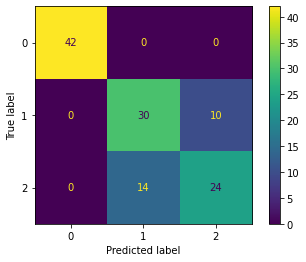

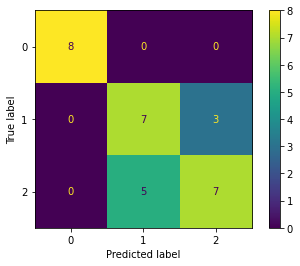

In [67]:
## Evaluation Plot
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(bayes, xtrain, ytrain)
plot_confusion_matrix(bayes, xtest, ytest)

In [68]:
data.head(), data[['Species']].value_counts()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0            5.1           3.5            1.4           0.2  Iris-setosa
 1            4.9           3.0            1.4           0.2  Iris-setosa
 2            4.7           3.2            1.3           0.2  Iris-setosa
 3            4.6           3.1            1.5           0.2  Iris-setosa
 4            5.0           3.6            1.4           0.2  Iris-setosa,
 Species        
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 dtype: int64)

In [69]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

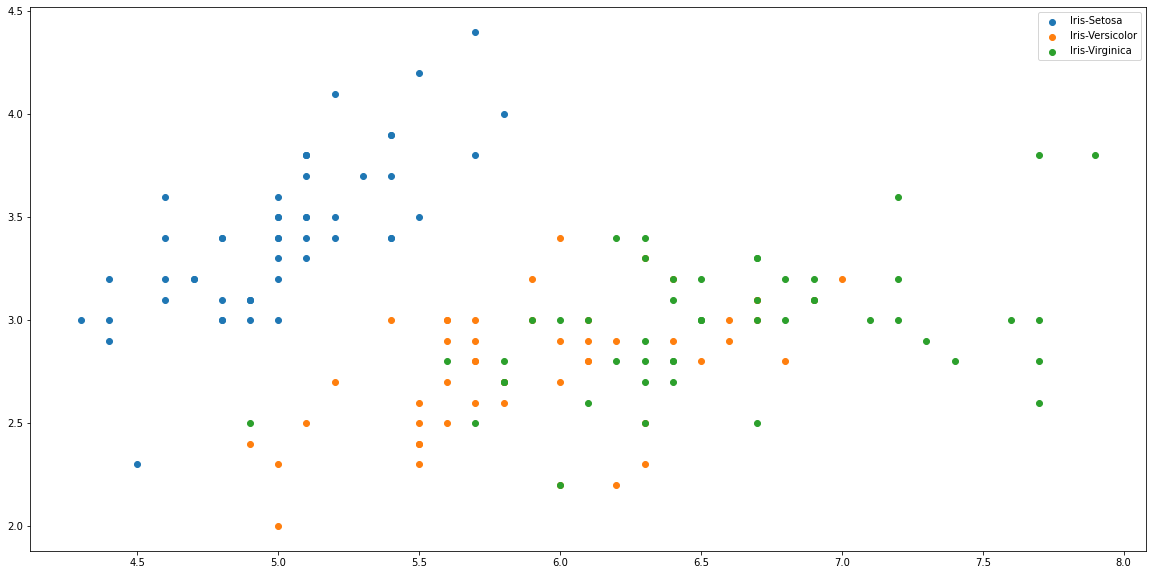

In [70]:
fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.scatter(setosa[['SepalLengthCm']], setosa[['SepalWidthCm']], label = 'Iris-Setosa')
axes.scatter(versicolor[['SepalLengthCm']], versicolor[['SepalWidthCm']], label = 'Iris-Versicolor')
axes.scatter(virginica[['SepalLengthCm']], virginica[['SepalWidthCm']], label = 'Iris-Virginica')
plt.legend()
plt.show()

In [71]:
## Task 

In [72]:
## Finding Best K through Hyperparameter tuning
from sklearn import model_selection

##
cv = model_selection.cross_val_score(bayes, scaledX, labeledY, cv=7)
cv, cv.mean()

(array([0.68181818, 0.86363636, 0.81818182, 0.66666667, 0.85714286,
        0.80952381, 0.9047619 ]),
 0.8002473716759432)

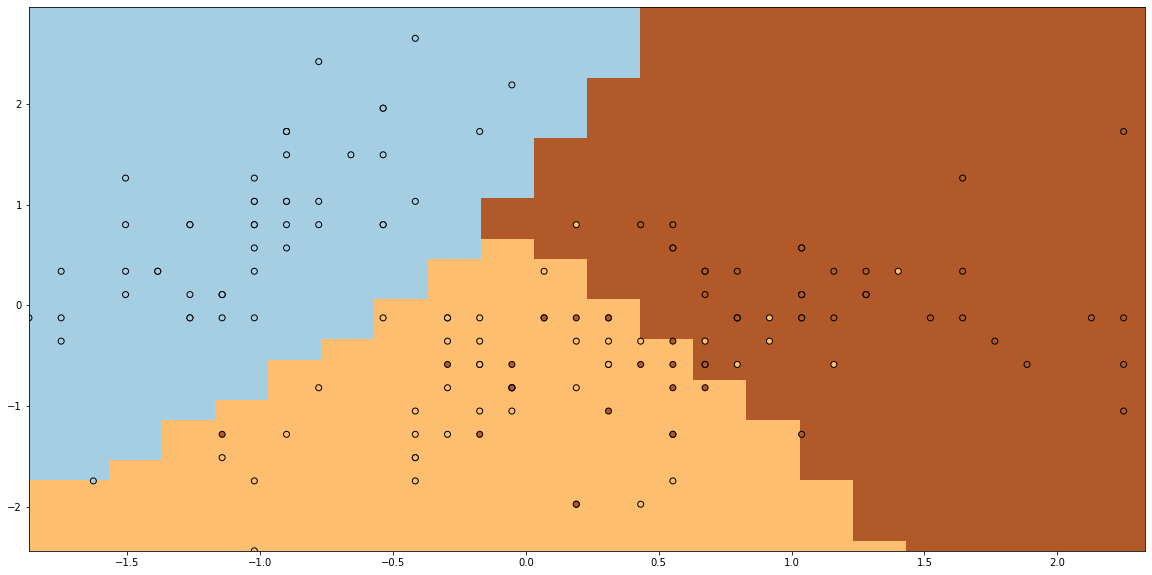

In [75]:
## Visualize Model
bayes.fit(scaledX,labeledY)
##
xmin, xmax = scaledX[:, 0].min(), scaledX[:, 0].max()
ymin, ymax = scaledX[:, 1].min(), scaledX[:, 1].max()


xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2)
)

# np.c_[xx.ravel(), yy.ravel()]
yhat = bayes.predict(np.c_[xx.ravel(), yy.ravel()])
yhat.shape, xx.shape
##
yhat = yhat.reshape(xx.shape)
yhat.shape

## Plotting
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, yhat, shading='auto')

plt.scatter(scaledX[:,0], scaledX[:, 1], c = labeledY, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [ ]:
xx.shape, xx1.shape